[[ 1.00000000e+00 -2.90983833e-05]
 [-2.90983833e-05  1.00000000e+00]]


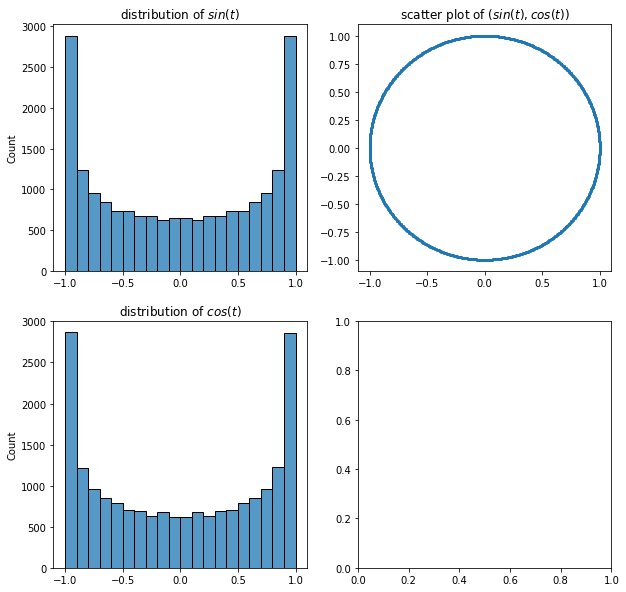

In [114]:
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as p
from numpy import random as rnd

# integer space
t = np.arange(-10000,10000,1)
s = np.sin(t)
c = np.cos(t)

# distribution
fig, axs = p.subplots(2,2, figsize = (10,10), sharex = False)

sns.histplot(s, ax = axs[0,0] )
sns.histplot(c, ax = axs[1,0] )
axs[0,1].scatter(c,s,marker = '.', s=5, alpha = 0.3)

axs[0,0].set_title("distribution of $sin(t)$")
axs[1,0].set_title("distribution of $cos(t)$")
axs[0,1].set_title("scatter plot of $(sin(t),cos(t))$")

corr = np.corrcoef(s,c)
print(corr)



[[1.0000000e+00 9.2400384e-04]
 [9.2400384e-04 1.0000000e+00]]


Text(0.5, 0.98, 'Distribution of $(x_{t},x_{t+1},...,x_{t+k})$ for $k=100$ and $t=0,1,..50$ where $x_t = A sin(t) + B cos(t)+ \\epsilon_t$')

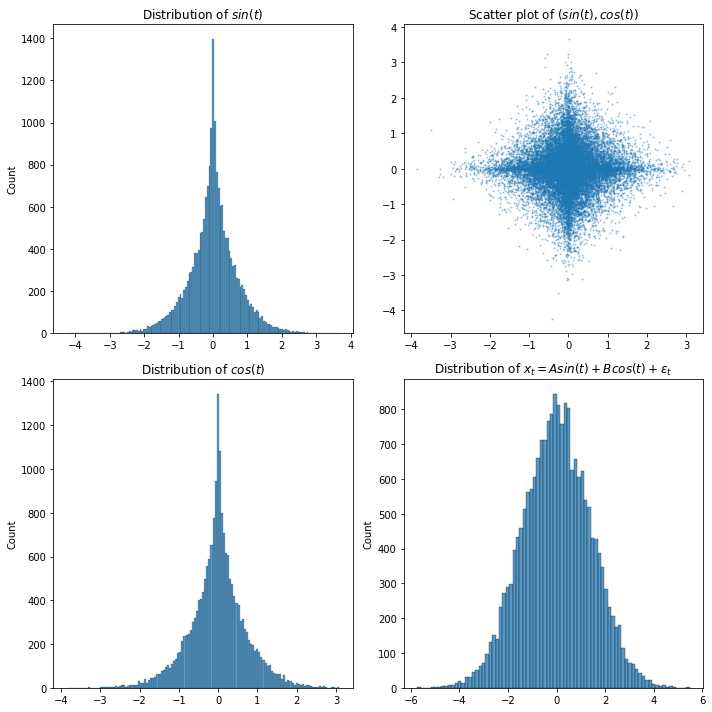

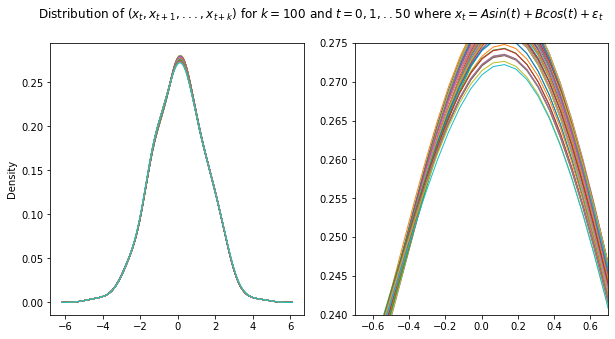

In [133]:
# integer space, white noise
μ,σ = 0,1
t = np.arange(-10000,10000,1)
n = len(t)
A = rnd.normal(μ,σ,n)
B = rnd.normal(μ,σ,n)
σ_2 = abs(rnd.normal(μ,σ))
ϵ_t = rnd.normal(μ,σ,n)
s = np.sin(t)*A
c = np.cos(t)*B
x = s+c+ϵ_t

# distribution
fig, axs = p.subplots(2,2, figsize = (10,10), sharex = False)

sns.histplot(s, ax = axs[0,0] )
sns.histplot(c, ax = axs[1,0] )
sns.histplot(x, ax = axs[1,1] )
axs[0,1].scatter(c,s,marker = '.', s=5, alpha = 0.3)

axs[0,0].set_title("Distribution of $sin(t)$")
axs[1,0].set_title("Distribution of $cos(t)$")
axs[0,1].set_title("Scatter plot of $(sin(t),cos(t))$")
axs[1,1].set_title("Distribution of $x_t = A sin(t) + B cos(t)+ \epsilon_t$")
p.tight_layout()

corr = np.corrcoef(s,c)
print(corr)

k = 1000
M = np.zeros([k,n-k])
for i in range(0,k):
    M[i,0:n-k] = x[i:n-k+i]

fig, axs = p.subplots(1,2,figsize = (10,5)) 
for i in range(0,50):
    sns.kdeplot(M[:,i],bw_adjust=1.3,color= p.viridis(), 
                lw= 1,alpha = 0.3, ax = axs[0] )
    axs[1].set_xlim(-0.7,0.7)
    axs[1].set_ylim(0.24,0.275)
    sns.kdeplot(M[:,i],bw_adjust=1.3,color= p.viridis(), 
                lw= 1,alpha = 0.3, ax = axs[1] )
axs[1].set_ylabel("")
fig.suptitle("Distribution of $(x_{t},x_{t+1},...,x_{t+k})$ for $k=100$ and $t=0,1,..50$ where $x_t = A sin(t) + B cos(t)+ \epsilon_t$",
                 fontsize = 12)
